# Jupyter Data Science Workflow

## From timeline exploratory data analysis to reproducible Data Science in Jupyter notebook 

#### Alexandre Carvalho

## Step 1 - Loading and Visualising Data

In [1]:
# Visualing plots in the notebook itself instead of separate windows
%matplotlib inline
import matplotlib.pyplot as plt
# Changing the style of the default plot using matplotlib styles module
plt.style.use('seaborn')

In [2]:
from jupyterworkflow.data import get_fremont_data

In [3]:
data = get_fremont_data()
data.head()

,East,West,Total
Date,,,
2019-01-01 00:00:00,0.0,9.0,9.0
2019-01-01 01:00:00,2.0,22.0,24.0
2019-01-01 02:00:00,1.0,11.0,12.0
2019-01-01 03:00:00,1.0,2.0,3.0
2019-01-01 04:00:00,2.0,1.0,3.0


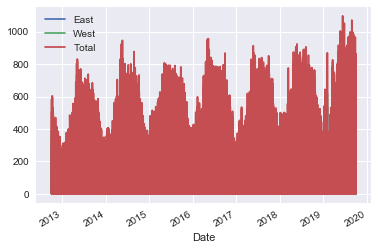

In [4]:
data.plot();

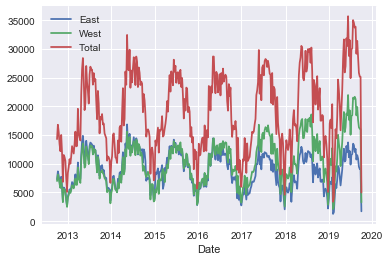

In [5]:
# Aggregation to ease the data visualisation
# Agregating the data by the number of rides each week ('W')
data.resample('W').sum().plot();

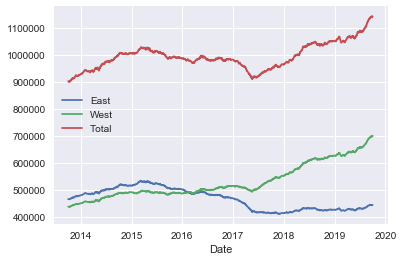

In [6]:
# Checking annual trends (growth, decline,..) for the number of riders
# Checking trends with 'rolling windows'
data.resample('D').sum().rolling(365).sum().plot();

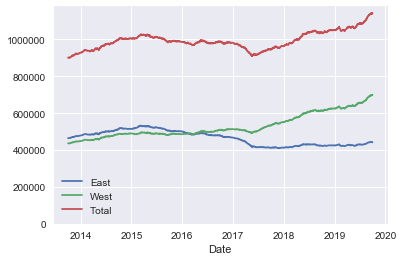

In [7]:
# Getting better notion of dimensions and proportions in the data setting Y limits to include 0
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

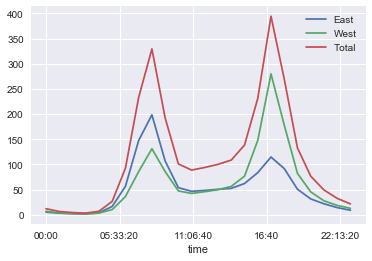

In [8]:
# Taking a look at the trends in idividual days (grouping by specific days) 
# Grouping by each time of the day thorough the year
data.groupby(data.index.time).mean().plot();

In [9]:
# Seeing the whole dataset in this way using pivot table
# A line for each day of the years
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


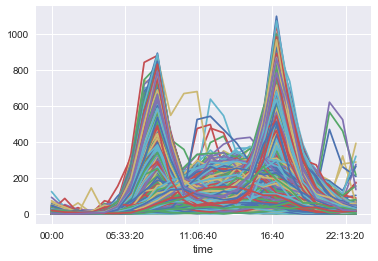

In [10]:
# Plotting pivoted data
pivoted.plot(legend=False)

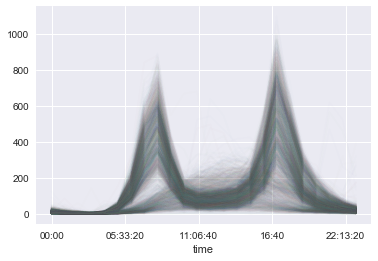

In [11]:
# Plotting pivoted data adding transparency to lines (alpha=0.01)
pivoted.plot(legend=False, alpha=0.01);

## Step 2 - Packaging up - Transforming the initial ingestion, loading and analysis process into a reproducible pipeline 

## Step 3 - Getting the function to download the data and turn it into a python package